In [1]:
from getHistoricalData import getHistoricalData, convert_hist_to_percentagechange
from binance.client import Client

import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sbn

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
savefig_options = dict(format="png", dpi=150, bbox_inches="tight")

# Computation packages
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw


In [ ]:
doge_ticker = 'DOGEUSDT'
sol_ticker = 'SOLUSDT'
start_date = '1 Aug 2021'

# Get Historical Data for DOGEUSDT and SOLUSDT
doge_hist = getHistoricalData(doge_ticker, Client.KLINE_INTERVAL_1DAY, start_date)
sol_hist = getHistoricalData(sol_ticker, Client.KLINE_INTERVAL_1DAY, start_date)

# Convert to histoical aggregate data to close_price data
doge_percentageChange = convert_hist_to_percentagechange(doge_hist)
sol_percentageChange = convert_hist_to_percentagechange(sol_hist)

# doge_cp.info()



In [11]:
sol_percentageChange.head()
sol_percentageChange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Open Time          895 non-null    datetime64[ns]
 1   Percentage Change  895 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.1 KB


In [12]:
doge_percentageChange.head()
doge_percentageChange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Open Time          895 non-null    datetime64[ns]
 1   Percentage Change  895 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.1 KB


In [14]:
doge_timeseries = doge_percentageChange['Percentage Change'].values
sol_timeseries = sol_percentageChange['Percentage Change'].values

# Use fastdtw to calculate DTW distance and the alignment path
distance, path = fastdtw(doge_timeseries, sol_timeseries)

# Print the DTW distance and the alignment path
print(f'DTW Distance: {distance}')
print('Alignment Path:')
print(path)

DTW Distance: 2965.5596721728853
Alignment Path:
[(0, 0), (1, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 5), (3, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 13), (5, 14), (6, 15), (7, 16), (8, 17), (9, 18), (10, 19), (10, 20), (10, 21), (10, 22), (10, 23), (10, 24), (11, 25), (11, 26), (12, 27), (12, 28), (12, 29), (12, 30), (13, 31), (13, 32), (14, 33), (14, 34), (15, 35), (16, 36), (17, 37), (18, 38), (19, 39), (20, 40), (21, 40), (22, 41), (23, 42), (24, 43), (25, 44), (26, 44), (27, 44), (28, 44), (29, 44), (30, 44), (31, 44), (32, 44), (33, 44), (34, 44), (35, 44), (36, 45), (37, 46), (38, 46), (39, 46), (40, 46), (41, 47), (42, 48), (42, 49), (42, 50), (43, 51), (44, 52), (45, 52), (46, 52), (47, 52), (48, 53), (49, 53), (50, 54), (51, 55), (52, 56), (53, 57), (54, 57), (55, 57), (56, 57), (57, 57), (58, 58), (59, 58), (60, 59), (61, 59), (62, 59), (63, 60), (64, 61), (65, 62), (66, 63), (67, 64), (68, 64), (69, 65), (70, 66), (71, 66), (72, 67), (73, 68), (74, 68), (

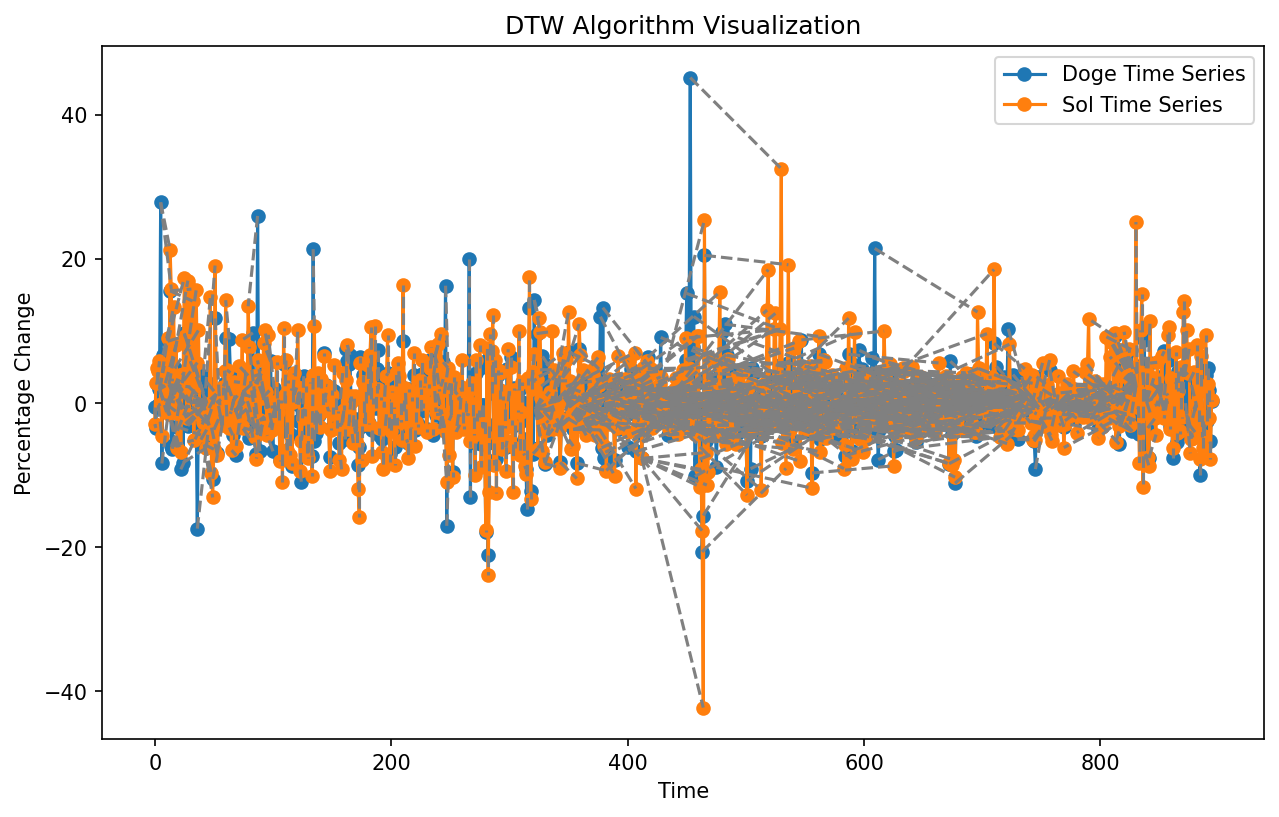

DTW Distance: 2965.5596721728853
Alignment Path:
[(0, 0), (1, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 5), (3, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 13), (5, 14), (6, 15), (7, 16), (8, 17), (9, 18), (10, 19), (10, 20), (10, 21), (10, 22), (10, 23), (10, 24), (11, 25), (11, 26), (12, 27), (12, 28), (12, 29), (12, 30), (13, 31), (13, 32), (14, 33), (14, 34), (15, 35), (16, 36), (17, 37), (18, 38), (19, 39), (20, 40), (21, 40), (22, 41), (23, 42), (24, 43), (25, 44), (26, 44), (27, 44), (28, 44), (29, 44), (30, 44), (31, 44), (32, 44), (33, 44), (34, 44), (35, 44), (36, 45), (37, 46), (38, 46), (39, 46), (40, 46), (41, 47), (42, 48), (42, 49), (42, 50), (43, 51), (44, 52), (45, 52), (46, 52), (47, 52), (48, 53), (49, 53), (50, 54), (51, 55), (52, 56), (53, 57), (54, 57), (55, 57), (56, 57), (57, 57), (58, 58), (59, 58), (60, 59), (61, 59), (62, 59), (63, 60), (64, 61), (65, 62), (66, 63), (67, 64), (68, 64), (69, 65), (70, 66), (71, 66), (72, 67), (73, 68), (74, 68), (

In [15]:
# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(doge_timeseries, label='Doge Time Series', marker='o')
plt.plot(sol_timeseries, label='Sol Time Series', marker='o')

# Highlight the aligned points using the path
for i, j in path:
    plt.plot([i, j],
             [doge_timeseries[i], sol_timeseries[j]],
             linestyle='dashed', color='gray')

plt.title('DTW Algorithm Visualization')
plt.xlabel('Time')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

# Print the DTW distance and the alignment path
print(f'DTW Distance: {distance}')
print('Alignment Path:')
print(path)